In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def compute_J(g1, g2, w1, w2, wr):
    numerator = g1 * g2 * (w1 + w2 - 2 * wr)
    denominator = 2 * (w1 - wr) * (w2 - wr)
    
    # Calculate the exchange coupling J
    J = numerator / denominator
    return J

def zz_strength(J, d1, d2, D, W):
    """Based on Gambetta paper."""
    factor = J**2/2/(d1 + D)**2
    A = 2*(d1 + D)*(d1 + d2)/(D - d2)
    B =  ( (d1**3 - 2*d1*D**2 - 2*D**3)/(d1*D**2*(d2-D))
          + 1/2*(4*(3*d1+D)*(d1**2+d1*D+D**2)/(D**2*(2*d1+D)**2) - 16*D/(3*d1**2+8*d1*D+4*D**2) )
          + 2*d1/(D*d2)
          - 2*(d1+D)/(d1+D-d2)**2
          - 2*(d1+D)/d1/(d1+D-d2)

         )*W**2
    return factor*A, factor*B

def zx_strength(J, anharm1, w1, w2, drive_strength):
    delta_w1w2 = w1 - w2
    ZX = -J*drive_strength/delta_w1w2*(anharm1/(anharm1+delta_w1w2)) + J*drive_strength**3*anharm1**2*(3*anharm1**3+11*anharm1**2*delta_w1w2+15*anharm1*delta_w1w2**2+9*delta_w1w2**3)/2/delta_w1w2**3/(anharm1+delta_w1w2)**3/(anharm1+2*delta_w1w2)/(3*anharm1+2*delta_w1w2)
    return ZX

def ix_strength(J, anharm1, w1, w2, drive_strength):
    delta_w1w2 = w1 - w2
    IX = -J*drive_strength/(delta_w1w2 + anharm1) + delta_w1w2*anharm1*J*drive_strength**3 / (delta_w1w2+anharm1)**3 / (2*delta_w1w2 + anharm1) / (2*delta_w1w2 + 3*anharm1)
    return IX

In [29]:
g1 = 0.03
g2 = 0.04
anharm1 = -0.23
anharm2 = -0.21
w1 = 4.5
w2 = 4.1
wr = 7
drive_strength = 0.0
J = compute_J(g1, g2, w1, w2, wr)
D = w1 - w2
zz_stat, zz_drive = zz_strength(J, anharm1, anharm2, D, drive_strength)
zz_tot = zz_stat + zz_drive
zx_str = zx_strength(J, anharm1, w1, w2, drive_strength)
quantum_crosstalk = ix_strength(J, anharm1, w1, w2, drive_strength)

print("J = ", J)
print("zz_stat = ", zz_stat)
print("zz_drive = ", zz_drive)
print("zz_tot = ", zz_tot)
print("zx_strength = ", zx_str)
print("quantum_crosstalk = ", quantum_crosstalk)

J =  -0.00044689655172413785
zz_stat =  -8.473989613778861e-07
zz_drive =  -0.0
zz_tot =  -8.473989613778861e-07
zx_strength =  -0.0
quantum_crosstalk =  0.0


(-0.001, 0.001)

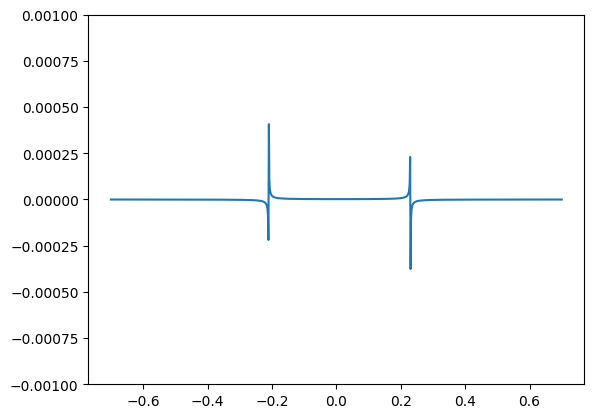

In [25]:
Delta = np.linspace(-0.7,0.7, 1000)
zz_stat, zz_drive = zz_strength(J, anharm1, anharm2, Delta, drive_strength)
zx = zx_strength(J, anharm1, w1, w1 + Delta, drive_strength)
plt.plot(Delta, zz_stat)
plt.ylim([-1e-3, 1e-3])

(-0.001, 0.001)

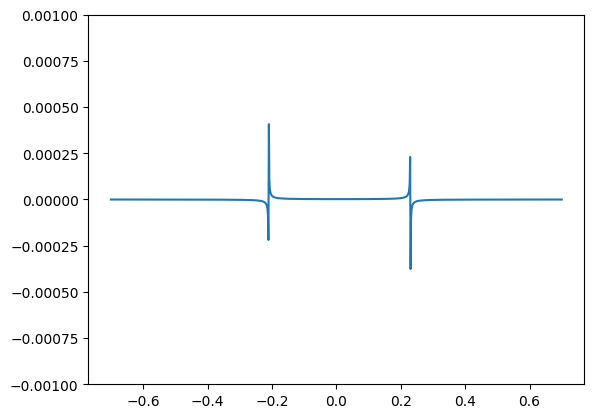

In [26]:
plt.plot(Delta, zz_stat)
plt.ylim([-1e-3, 1e-3])

(-0.004, 0.004)

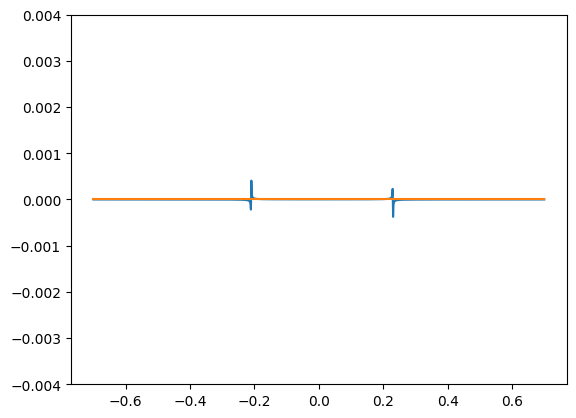

In [27]:
plt.plot(Delta,  zz_stat + zz_drive)
plt.plot(Delta, zx)
plt.ylim([-4e-3, 4e-3])

C:\Users\moret\AppData\Local\Temp\ipykernel_16328\3548294413.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Delta, (zz_stat + zz_drive)/zx)


(-1.0, 1.0)

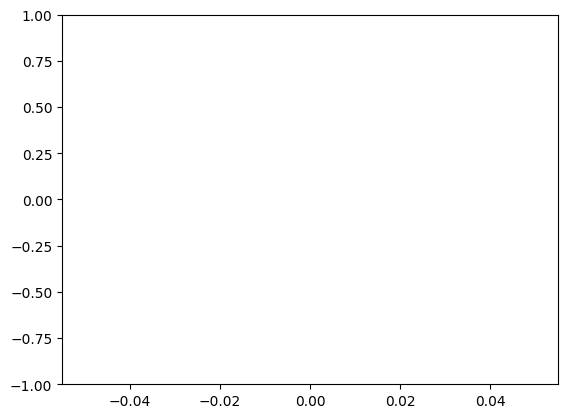

In [28]:
plt.plot(Delta, (zz_stat + zz_drive)/zx)
plt.ylim([-1, 1])